In [81]:
# initial setup
try:
    # settings colab:
    import google.colab
        
except ModuleNotFoundError:    
    # settings local:
    %run "../../../common/0_notebooks_base_setup.py"

pandas=1.0.3 already installed
matplotlib=2.2.2 already installed
bokeh=2.0.0 already installed
seaborn=0.10.0 already installed


In [82]:
import pandas as pd
import seaborn as sns
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import chart_studio
import chart_studio.plotly as py
import unidecode as ud

In [83]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.width', 5000)

In [84]:
data = pd.read_csv("properati.csv")

In [85]:
#CREAR COPIA DEL DATASET ORIGINAL
data_clean = data.copy(deep=True)
data_clean.drop(["Unnamed: 0"], axis=1, inplace=True)

<h2 id="Secciones" style="color: lightblue">Secciones</h2>

<li style="color: lightblue"><a href="#Generales" style="font-size: 18px">Generales</a></li>
<li style="color: lightblue"><a href="#Operaciones" style="font-size: 18px">Tipos de Operaciones</a></li>
<li style="color: lightblue"><a href="#Ubicaciones" style="font-size: 18px">Ubicaciones</a></li>
<li style="color: lightblue"><a href="#PreciosYSuperficie" style="font-size: 18px">Precios y Superficie</a></li>

<hr id="Generales">

<h2 style="color: lightblue">GENERALES</h2>

In [86]:
#Columnas String
columnas_str = ['operation', 'property_type', 'place_name', 'place_with_parent_names', 'country_name', 'state_name', 'description', 'title']

In [87]:
#Quitar espacios en blanco
for columna in columnas_str:
    data_clean[columna] = data_clean[columna].str.strip()

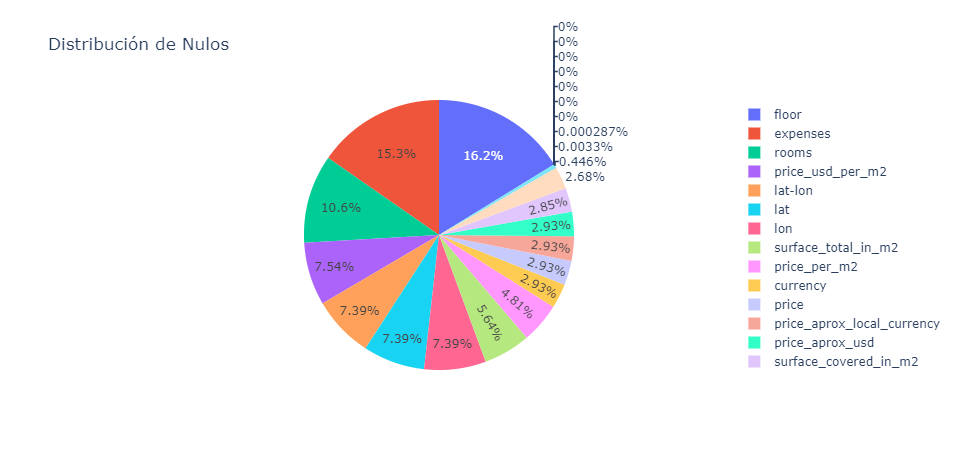

In [88]:
serieCantidadNulos = data_clean.isnull().sum()
dataCantidadNulos = { "Variable" : serieCantidadNulos.index, "Cantidad" : serieCantidadNulos.values}
dfCantidadNulos = pd.DataFrame(dataCantidadNulos, columns=["Variable", "Cantidad"])

fig = px.pie(dfCantidadNulos, values='Cantidad', names='Variable', title='Distribución de Nulos')
fig.show()

<br>
<div style="width: 100%; text-align: right"><a href="#Secciones"><img src="GoUp.png" style="height: 50px"></a></div>

<hr id="Operaciones">
<h2 style="color: lightblue">TIPOS DE OPERACIONES</h2>

In [89]:
#Expresión regular para buscar venta o alquiler
regex = re.compile("(venta)|(alquiler)", flags = re.IGNORECASE)

In [90]:
#Buscar Venta o Alquiler en description
regexOperacionesDescription = data_clean.description.apply(lambda x: regex.search(str(x)))
dfVentasDescription = regexOperacionesDescription.apply(lambda x: np.NaN if x is None else x.group(0))

#Normalizar
dfVentasDescription[dfVentasDescription.notnull()].unique()
dfVentasDescription.replace(["VENTA", "venta"], "Venta", inplace=True)
dfVentasDescription.replace(["alquiler", "ALQUILER"], "Alquiler", inplace=True)
dfVentasDescription[dfVentasDescription.notnull()].unique()

#Crear columna Operacion
data_clean["Operacion_Description"] = dfVentasDescription
data_clean["Operacion_Description"].value_counts()

Venta       42336
Alquiler     1325
Name: Operacion_Description, dtype: int64

In [91]:
#Buscar Venta o Alquiler en title
regexOperacionesTitle = data_clean.title.apply(lambda x: regex.search(str(x)))
dfVentasTitle = regexOperacionesTitle.apply(lambda x: np.NaN if x is None else x.group(0))

#Normalizar
dfVentasTitle[dfVentasTitle.notnull()].unique()
dfVentasTitle.replace(["VENTA", "venta"], "Venta", inplace=True)
dfVentasTitle.replace(["alquiler", "ALQUILER"], "Alquiler", inplace=True)
dfVentasTitle[dfVentasTitle.notnull()].unique()

#Crear columna Title
data_clean["Operacion_Title"] = dfVentasTitle
data_clean["Operacion_Title"].value_counts()

Venta       36131
Alquiler      217
Name: Operacion_Title, dtype: int64

In [92]:
#Buscar Venta o Alquiler en properati_url
regexOperacionesURL = data_clean.properati_url.apply(lambda x: regex.search(str(x)))
dfVentasURL = regexOperacionesURL.apply(lambda x: np.NaN if x is None else x.group(0))

#Normalizar
dfVentasURL[dfVentasURL.notnull()].unique()
dfVentasURL.replace(["VENTA", "venta"], "Venta", inplace=True)
dfVentasURL.replace(["alquiler", "ALQUILER"], "Alquiler", inplace=True)
dfVentasURL[dfVentasURL.notnull()].unique()

#Crear columna URL
data_clean["Operacion_URL"] = dfVentasURL
data_clean["Operacion_URL"].value_counts()

Venta       121086
Alquiler       134
Name: Operacion_URL, dtype: int64

In [93]:
#Precios mínimos y máximos para alquiler
data_clean[data_clean.price_aprox_usd > 0].filter(items=["property_type", "price_aprox_usd"]).groupby(by="property_type").agg(['min', 'max'])

price_aprox_usd            
                          min         max
property_type                            
PH                    5047.53   2800000.0
apartment             4666.62  46545445.0
house                 5047.53  25000000.0
store                 4952.45  13000000.0

In [94]:
#Revisar los casos con precios menores a 10.000 para ver que no sean alquileres
data_clean[(data_clean.property_type == "house") & (data_clean.price_aprox_usd < 10000)].filter(items=["price_aprox_usd", "description"]).head(10)

,price_aprox_usd,description
7440,7010.45,"EXCELENTE CABAÑA 3 DORM, 2 BAÑOS, PARQUE, A 30..."
9665,9534.22,CODIGO: 7 ubicado en: Juana Manuela Gorritti -...
9761,0.00,Casa en Venta de 2 dorm. en Armenia
12372,8412.55,FRACCION DE TERRENO AL FONDOA SUBDIVIDIR. AL F...
16012,8412.55,"EXCELENTE ACCESO Y UBICACIÓN SUPERFICIE : 413,..."
19730,7963.88,Corredor Responsable: JORGE BECCO - CSI 5675Co...
28510,8749.92,Chalet en dos plantas. Barrio San Carlos. Vice...
40583,5776.61,CODIGO: 2347-453 ubicado en: villa carlos paz ...
47550,7571.29,CODIGO: 1520-MYR442248 ubicado en: General Paz...
104072,5047.53,"DOS DORMITORIOS, COCINA COMEDOR DIARIO, LIVING..."


In [95]:
#Revisar los casos con precios menores a 10.000 para ver que no sean alquileres
data_clean[(data_clean.property_type == "apartment") & (data_clean.price_aprox_usd < 10000)].filter(items=["price_aprox_usd", "description"]).head(10)

,price_aprox_usd,description
4399,5000.00,Corredor Responsable: Mauro Marvisi - CMCPSI 5...
6720,5608.31,BV Rondeau / Nancen: A metros del Shoping Port...
17731,5608.36,CODIGO: ubicado en: COOPERATIVA DE VIVIENDA R...
18705,5608.36,CODIGO: 85 ubicado en: mitre 100 - Publicado ...
19336,7851.71,Departamento de dos dormitorios con placard en...
20133,5103.61,CODIGO: 6375 ubicado en: Vera 1100 - Publicad...
21197,7583.27,SE OFRECE DEPARTAMENTO DE 2 DORMITORIOS EN BAR...
23142,7963.88,Corredor Responsable: Mariana Carrizo - CPCPI:...
23307,8973.38,Corredor Responsable: Caroline Hogner - CCI St...
26931,9500.00,Excelente Metros de Subte Lnea *A* Frente Sup...


In [96]:
#Revisar los casos con precios menores a 10.000 para ver que no sean alquileres
data_clean[(data_clean.property_type == "store") & (data_clean.price_aprox_usd < 10000)].filter(items=["price_aprox_usd", "description"]).head(10)

,price_aprox_usd,description
836,8412.55,"Venta de Negocio en Tolosa, La Plata116 entre..."
37594,6730.04,"Venta de puesto de diarios, excelente ubicació..."
40173,8244.30,"Fondo de comercio almacén/quiosco.En Galeria, ..."
40576,6231.51,CODIGO: 1834-024 ubicado en: LOCAL CENTRICO EN...
46687,8973.38,SE VENDE O SE ALQUILAN MAQUINAS + BANCOS - BA...
48004,8412.55,Fondo de comercio : De Indumentaria Femenina. ...
51890,8412.55,26 LOTES EXCEPCIONALES EN GENERAL RODRIGUEZ.PO...
56407,7500.00,"LOCALSARGENTO CABRAL 8, RAMOS MEJÍA. LOCAL DE ..."
56924,8412.55,Fondo de comercio : De Indumentaria Femenina. ...
58951,6231.51,CODIGO: 3122-VBB-019 ubicado en: Rondeau 201 -...


In [97]:
#Asignar "Fondo de Comercio"
regex = re.compile("venta de negocio|fondo de comercio", flags = re.IGNORECASE)
regexLocal = data_clean[(data_clean.property_type == "store")].description.apply(lambda x: regex.search(str(x)))
locales = regexLocal[regexLocal.notnull()].apply(lambda x: np.NaN if x is None else x.group(0))
data_clean.loc[locales.index, "property_type"] = "Fondo de Comercio"

<br>
<div style="width: 100%; text-align: right"><a href="#Secciones"><img src="GoUp.png" style="height: 50px"></a></div>

<hr id="Ubicaciones">
<h2 style="color: lightblue">UBICACIONES</h2>

<br>
<div style="width: 100%; text-align: right"><a href="#Secciones"><img src="GoUp.png" style="height: 50px"></a></div>

<hr id="PreciosYSuperficie">
<h2 style="color: lightblue">PRECIOS Y SUPERFICIE</h2>

<span style="font-size:18px">NULOS AL INICIO<span>

In [98]:
priceAproxUSDNulosInicio = data_clean.price_aprox_usd.isnull().sum()
priceUSDPerM2NulosInicio = data_clean.price_usd_per_m2.isnull().sum()
surfaceTotalInM2NulosInicio = data_clean.surface_total_in_m2.isnull().sum()

<span style="font-size:18px">COMPLETAR price_aprox_usd<span>

In [99]:
regex = re.compile("USD\s+[\d|.]{3,10}", flags = re.IGNORECASE)
regexPrecio = data_clean[(data_clean.price_aprox_usd.isnull())].description.apply(lambda x: regex.search(str(x)))
resultado = regexPrecio.apply(lambda x: np.NaN if x is None else x.group(0).lower().replace("usd", "").replace(".", "").strip()).astype(np.float64)
print("Antes: ", data_clean.price_aprox_usd.isnull().sum())
data_clean.loc[resultado.index, "price_aprox_usd"]  = resultado
print("Después: ", data_clean.price_aprox_usd.isnull().sum())

Antes:  20410
Después:  20274


In [100]:
regexPrecio = data_clean[(data_clean.price_aprox_usd.isnull())].title.apply(lambda x: regex.search(str(x)))
resultado = regexPrecio.apply(lambda x: np.NaN if x is None else x.group(0).lower().replace("usd", "").replace(".", "").strip()).astype(np.float64)
print("Antes: ", data_clean.price_aprox_usd.isnull().sum())
data_clean.loc[resultado.index, "price_aprox_usd"]  = resultado
print("Después: ", data_clean.price_aprox_usd.isnull().sum())

Antes:  20274
Después:  20273


<span style="font-size:18px">COMPLETAR price_usd_per_m2<span>

<span style="font-size:16px; text-decoration: underline">NULOS price_usd_per_m2<span>

In [101]:
#Buscar nulos
priceUSDPerM2NullMask = data_clean.price_usd_per_m2.isnull()
print("Nulos: ", priceUSDPerM2NullMask.sum(), "\n")
display(data_clean[priceUSDPerM2NullMask].head(2))

Nulos:  52603 



,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,Operacion_Description,Operacion_Title,Operacion_URL
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,Venta,Venta,Venta
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,NaN,NaN,Venta


In [102]:
#Nulos por tipo de propiedad
popertyTypeGroupBy1 = data_clean[priceUSDPerM2NullMask].groupby(by="property_type")
popertyTypeGroupBy1["property_type"].count()

#Con esto se puede iterar sobre cada grupo y ver los registros por separado
#for name, group in popertyTypeGroupBy1: 
#    display(name) 
#    display(group) 
#    print() 

property_type
Fondo de Comercio       93
PH                    2497
apartment            28178
house                19909
store                 1926
Name: property_type, dtype: int64

<span style="font-size:16px; text-decoration: underline">NULOS price_per_m2<span>

In [103]:
#Buscar nulos
pricePerM2NullMask = data_clean.price_per_m2.isnull()
print(pricePerM2NullMask.sum())
display(data_clean[pricePerM2NullMask].filter(items=["price_per_m2", "currency"]).head(5))

33562


,price_per_m2,currency
1,NaN,USD
3,NaN,USD
5,NaN,NaN
9,NaN,ARS
10,NaN,USD


In [104]:
#Nulos por tipo de propiedad
popertyTypeGroupBy2 = data_clean[pricePerM2NullMask].groupby(by="property_type")
popertyTypeGroupBy2["property_type"].count()

property_type
Fondo de Comercio       85
PH                    1199
apartment            18871
house                11915
store                 1492
Name: property_type, dtype: int64

<span style="font-size:16px; text-decoration: underline">IMPUTAR VALORES EN price_usd_per_m2 a partir de price_per_m2<span>

In [105]:
#Buscar price_per_m2 en USD para imputar en price_usd_per_m2
pricePerM2NoNulos = data_clean[(priceUSDPerM2NullMask) & \
                   (~pricePerM2NullMask) & \
                   (data_clean.currency == "USD")].price_per_m2
display(pricePerM2NoNulos.head(3))

68    3263.888889
77    1764.705882
79    2809.523810
Name: price_per_m2, dtype: float64

In [106]:
print("Nulos antes: ", data_clean.price_usd_per_m2.isnull().sum())
data_clean.loc[pricePerM2NoNulos.index, "price_usd_per_m2"] = pricePerM2NoNulos
print("Nulos después: ", data_clean.price_usd_per_m2.isnull().sum())


Nulos antes:  52603
Nulos después:  31166


In [107]:
#Buscar price_por_m2 en pesos
display(data_clean[(priceUSDPerM2NullMask) & \
                   (~pricePerM2NullMask) & \
                   (data_clean.currency == "ARG")].filter(items=["price_usd_per_m2", "price_per_m2", "currency"]))

,price_usd_per_m2,price_per_m2,currency


<span style="font-size:16px; text-decoration: underline">IMPUTAR VALORES EN price_usd_per_m2 CRUZANDO POR UBICACIONES y precio_aprox_usd<span>

In [108]:
#Apartment sin price_usd_per_m2 con price_aprox_usd
data_clean["Indice"] = data_clean.index
dfGrupo1 = data_clean[(data_clean.price_usd_per_m2.isnull()) & (data_clean.price_aprox_usd.notnull())].filter(items=["property_type", "Indice", "state_name", "place_name", "place_with_parent_names", "price_aprox_usd"])
#Apartment con price_usd_per_m2 y con price_aprox_usd
dfGrupo2 = data_clean[(data_clean.price_usd_per_m2.notnull()) & (data_clean.price_aprox_usd.notnull())].filter(items=["property_type", "state_name", "place_name", "place_with_parent_names", "price_usd_per_m2", "price_aprox_usd"])

In [109]:
print("Nulos antes: ", data_clean.price_usd_per_m2.isnull().sum())
gruposMerge = pd.merge(dfGrupo1, dfGrupo2, how="inner", on=["property_type", "place_with_parent_names", "price_aprox_usd"])
medianaPriceUSDPerM2 = gruposMerge.groupby(by=["property_type", "Indice"])[['price_usd_per_m2']].median()
medianaPriceUSDPerM2.reset_index(inplace=True)
medianaPriceUSDPerM2.set_index(["Indice"], inplace=True)
data_clean.loc[gruposMerge.Indice, "price_usd_per_m2"] = medianaPriceUSDPerM2.price_usd_per_m2
print("Nulos después: ", data_clean.price_usd_per_m2.isnull().sum())


Nulos antes:  31166
Nulos después:  25115


In [110]:
print("Nulos antes: ", data_clean.price_usd_per_m2.isnull().sum())
gruposMerge = pd.merge(dfGrupo1, dfGrupo2, how="inner", on=["property_type", "place_name", "price_aprox_usd"])
medianaPriceUSDPerM2 = gruposMerge.groupby(by=["property_type", "Indice"])[['price_usd_per_m2']].median()
medianaPriceUSDPerM2.reset_index(inplace=True)
medianaPriceUSDPerM2.set_index(["Indice"], inplace=True)
data_clean.loc[gruposMerge.Indice, "price_usd_per_m2"] = medianaPriceUSDPerM2.price_usd_per_m2
print("Nulos después: ", data_clean.price_usd_per_m2.isnull().sum())

Nulos antes:  25115
Nulos después:  24826


In [111]:
print("Nulos antes: ", data_clean.price_usd_per_m2.isnull().sum())
gruposMerge = pd.merge(dfGrupo1, dfGrupo2, how="inner", on=["property_type", "state_name", "price_aprox_usd"])
medianaPriceUSDPerM2 = gruposMerge.groupby(by=["property_type", "Indice"])[['price_usd_per_m2']].median()
medianaPriceUSDPerM2.reset_index(inplace=True)
medianaPriceUSDPerM2.set_index(["Indice"], inplace=True)
data_clean.loc[gruposMerge.Indice, "price_usd_per_m2"] = medianaPriceUSDPerM2.price_usd_per_m2
print("Nulos después: ", data_clean.price_usd_per_m2.isnull().sum())

Nulos antes:  24826
Nulos después:  22839


In [112]:
print("Nulos antes: ", data_clean.price_usd_per_m2.isnull().sum())
gruposMerge = pd.merge(dfGrupo1, dfGrupo2, how="inner", on=["property_type", "place_with_parent_names"])
medianaPriceUSDPerM2 = gruposMerge.groupby(by=["property_type", "Indice"])[['price_usd_per_m2']].median()
medianaPriceUSDPerM2.reset_index(inplace=True)
medianaPriceUSDPerM2.set_index(["Indice"], inplace=True)
data_clean.loc[gruposMerge.Indice, "price_usd_per_m2"] = medianaPriceUSDPerM2.price_usd_per_m2
print("Nulos después: ", data_clean.price_usd_per_m2.isnull().sum())

Nulos antes:  22839
Nulos después:  20389


In [113]:
print("Nulos antes: ", data_clean.price_usd_per_m2.isnull().sum())
gruposMerge = pd.merge(dfGrupo1, dfGrupo2, how="inner", on=["property_type", "place_name"])
medianaPriceUSDPerM2 = gruposMerge.groupby(by=["property_type", "Indice"])[['price_usd_per_m2']].median()
medianaPriceUSDPerM2.reset_index(inplace=True)
medianaPriceUSDPerM2.set_index(["Indice"], inplace=True)
data_clean.loc[gruposMerge.Indice, "price_usd_per_m2"] = medianaPriceUSDPerM2.price_usd_per_m2
print("Nulos después: ", data_clean.price_usd_per_m2.isnull().sum())

Nulos antes:  20389
Nulos después:  20365


In [114]:
print("Nulos antes: ", data_clean.price_usd_per_m2.isnull().sum())
gruposMerge = pd.merge(dfGrupo1, dfGrupo2, how="inner", on=["property_type", "state_name"])
medianaPriceUSDPerM2 = gruposMerge.groupby(by=["property_type", "Indice"])[['price_usd_per_m2']].median()
medianaPriceUSDPerM2.reset_index(inplace=True)
medianaPriceUSDPerM2.set_index(["Indice"], inplace=True)
data_clean.loc[gruposMerge.Indice, "price_usd_per_m2"] = medianaPriceUSDPerM2.price_usd_per_m2
print("Nulos después: ", data_clean.price_usd_per_m2.isnull().sum())

Nulos antes:  20365
Nulos después:  20283


In [115]:
dfOtros1 = data_clean[(data_clean.price_aprox_usd.notnull()) & (data_clean.surface_total_in_m2.notnull()) & (data_clean.price_usd_per_m2.isnull())]

In [116]:
dfOtros2 = data_clean[(data_clean.price_aprox_usd.notnull()) & (data_clean.surface_covered_in_m2.notnull()) & (data_clean.price_usd_per_m2.isnull())]

In [117]:
data_clean.loc[dfOtros2.index, "price_usd_per_m2"] = data_clean.loc[dfOtros2.index, "price_aprox_usd"] / data_clean.loc[dfOtros2.index, "surface_covered_in_m2"]

<span style="font-size:18px">IMPUTAR VALORES EN surface_total_in_m2 CON price_aprox_usd / price_usd_per_m2<span>

In [118]:
surfaceTotalInM2NullMask = (data_clean.surface_total_in_m2.isnull()) & \
                           (data_clean.price_aprox_usd.notnull()) & \
                           (data_clean.price_usd_per_m2.notnull())

print("Antes: ", data_clean.surface_total_in_m2.isnull().sum())
data_clean.loc[surfaceTotalInM2NullMask, "surface_total_in_m2"] = \
    data_clean.loc[surfaceTotalInM2NullMask, "price_aprox_usd"] / data_clean.loc[surfaceTotalInM2NullMask, "price_usd_per_m2"]
print("Despues: ", data_clean.surface_total_in_m2.isnull().sum())

Antes:  39328
Despues:  7341


In [119]:
regex = re.compile("[\d|.]{3,10}\sm2|superficie\s[\d|.]{3,10}", flags = re.IGNORECASE)
regexSuperficie = data_clean[(data_clean.surface_total_in_m2.isnull()) & \
                             ((data_clean.property_type == "PH") | \
                             (data_clean.property_type == "apartment") | \
                             (data_clean.property_type == "house"))].description.apply(lambda x: regex.search(str(x)))
resultadoSuperficie = regexSuperficie.apply(lambda x: np.NaN if x is None else x.group(0))
resultadoSuperficieMaskNotNull = resultadoSuperficie.notnull()
resultadoSuperficieSinNulos = resultadoSuperficie[resultadoSuperficieMaskNotNull]
print("Antes: ", data_clean.surface_total_in_m2.isnull().sum())
data_clean.loc[resultadoSuperficieSinNulos.index, "surface_total_in_m2"] = resultadoSuperficieSinNulos
print("Despues: ", data_clean.surface_total_in_m2.isnull().sum())

Antes:  7341
Despues:  6635


In [120]:
dfSuperficies1 = data_clean.loc[resultadoSuperficieSinNulos.index, :]
dfSuperficies2 = dfSuperficies1[(dfSuperficies1.price_aprox_usd.notnull()) & (dfSuperficies1.price_usd_per_m2.isnull())]
dfSuperficies2.filter(items=["price_aprox_usd", "surface_total_in_m2"])

,price_aprox_usd,surface_total_in_m2


<span style="font-size:18px">% DE REDUCCION DE NULOS<span>

In [121]:
priceAproxUSDNulosFin = data_clean.price_aprox_usd.isnull().sum()
priceUSDPerM2NulosFin = data_clean.price_usd_per_m2.isnull().sum()
surfaceTotalInM2NulosFin = data_clean.surface_total_in_m2.isnull().sum()

In [122]:
porcPriceAproxUSDNulos = 100 - (priceAproxUSDNulosFin / priceAproxUSDNulosInicio * 100)
porcPriceUSDPerM2Nulos = 100 - (priceUSDPerM2NulosFin / priceUSDPerM2NulosInicio * 100)
porcSurfaceTotalInM2Nulos = 100 - (surfaceTotalInM2NulosFin / surfaceTotalInM2NulosInicio * 100)
print("% reducción de nulos price_aprox_usd: ", porcPriceAproxUSDNulos)
print("% reducción de nulos price_usd_per_m2: ", porcPriceUSDPerM2Nulos)
print("% reducción de nulos surface_total_in_m2: ", porcSurfaceTotalInM2Nulos)

% reducción de nulos price_aprox_usd:  0.6712395884370466
% reducción de nulos price_usd_per_m2:  61.44326369218486
% reducción de nulos surface_total_in_m2:  83.12906834825061


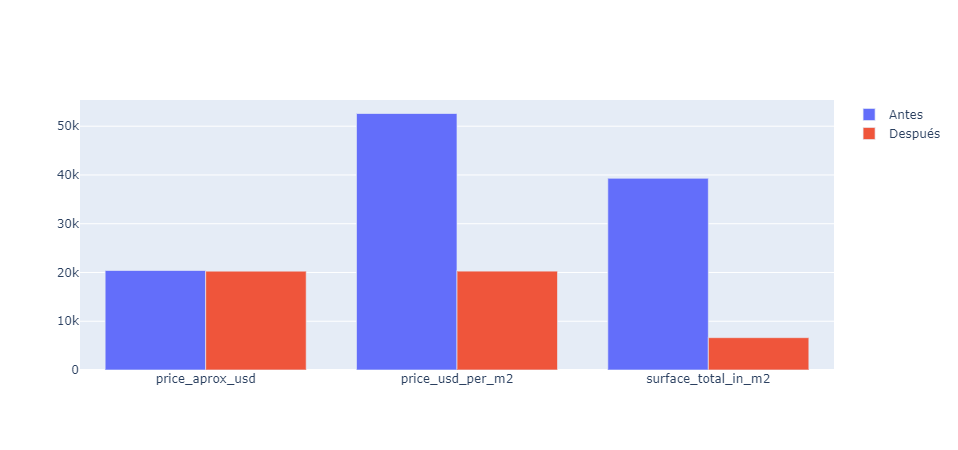

In [123]:
arrayVariables=["price_aprox_usd", "price_usd_per_m2", "surface_total_in_m2"]

fig = go.Figure(data=[
    go.Bar(name='Antes', x=arrayVariables, y=[priceAproxUSDNulosInicio, priceUSDPerM2NulosInicio, surfaceTotalInM2NulosInicio]),
    go.Bar(name='Después', x=arrayVariables, y=[priceAproxUSDNulosFin, priceUSDPerM2NulosFin, surfaceTotalInM2NulosFin])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

<br>
<div style="width: 100%; text-align: right"><a href="#Secciones"><img src="GoUp.png" style="height: 50px"></a></div>